# Nathaniel Davis

# Intro

I chose violent crimes as my metric. I think violent crimes better portrays a neighborhood's safety than all crimes because this doesn't include things like traffic violations or minor property crimes. I filtered for violent crimes by selecting all crimes where the crime was against a person. This includes things like assault, intimidation, etc. I also chose to normalize the data against neighborhood populations because a bigger neighborhood will naturally have more crimes. By calculating crimes per 1,000 residents, I can fairly compare neighborhoods of different sizes. The formula is: (crimes / population) * 1000.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

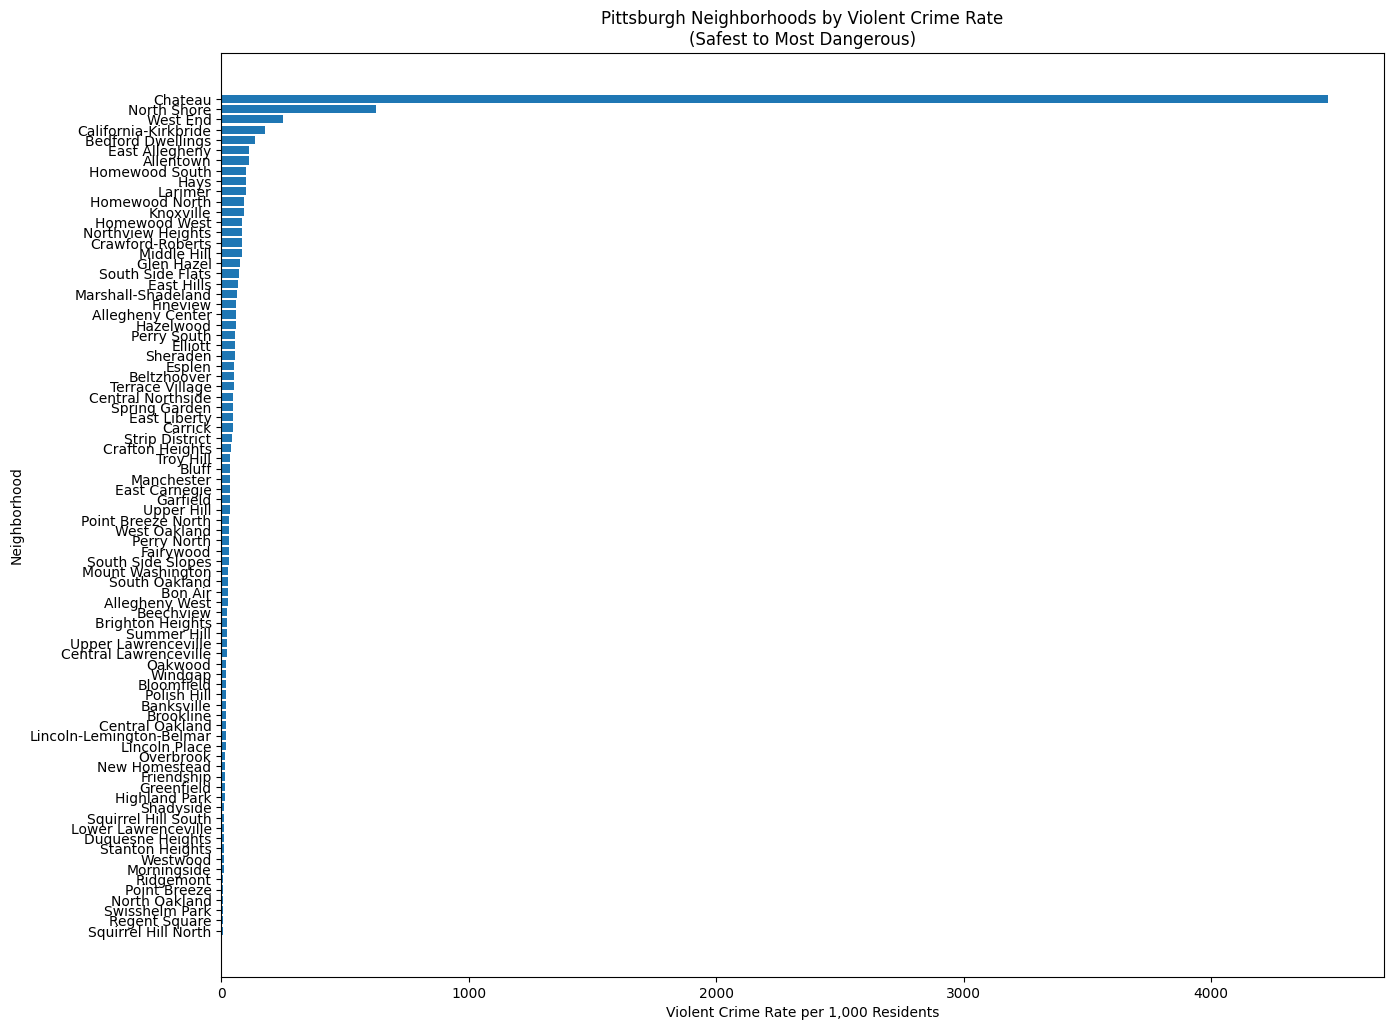

,Neighborhood,Violent_Crime_Count,2020_Total_Population,Rate_per_1000
68,Squirrel Hill North,59,11879,4.966748
60,Regent Square,5,971,5.149331
73,Swisshelm Park,7,1339,5.227782
50,North Oakland,70,10691,6.547563
57,Point Breeze,38,5348,7.105460


In [53]:
# load datasets
crime = pd.read_csv('crime.csv', low_memory=False)
population = pd.read_csv('population.csv')

# filter violent crimes and group by neighborhood
violent_crimes = crime[crime['NIBRS_Crime_Against'] == 'Person']
violent_counts = violent_crimes.groupby('Neighborhood').size().reset_index(name='Violent_Crime_Count')

# merge crimes and population and find rate per 1000
safety = violent_counts.merge(population[['Neighborhood', '2020_Total_Population']], on='Neighborhood')
safety['Rate_per_1000'] = (safety['Violent_Crime_Count'] / safety['2020_Total_Population'] * 1000)

# sort
by_rate = safety.sort_values('Rate_per_1000')

# chart: rate per 1,000
plt.figure(figsize=(15, 12))
plt.barh(by_rate['Neighborhood'], by_rate['Rate_per_1000'])
plt.xlabel('Violent Crime Rate per 1,000 Residents')
plt.ylabel('Neighborhood')
plt.title('Pittsburgh Neighborhoods by Violent Crime Rate\n(Safest to Most Dangerous)')
plt.show()

# show top 5
by_rate.head()

# Narrative

The data shows that Squirrel Hill North has the least amount of violent crimes per 1,000 residents at only around 5. I've been to Squirrel Hill and I can't say I'm too surprised. They have a relatively high population (almost 12,000 people) but they're peaceful enough to stay at number 1.

The top 5 safest neighborhoods are:
1. Squirrel Hill North - 4.97
2. Regent Square - 5.15
3. Swisshelm Park - 5.23
4. North Oakland - 5.51
5. Oakwood - 7.12

On the opposite end, Chateau is off the charts with over 4,400 crimes per 1,000 residents because their population is only 19 people and they had 85 violent crimes. That's basically a outlier.

# Conclusion

I like Squirrel Hill so I'm glad it ranked number one. I live in North Oakland so I'm happy it got number four overall, but top 3 wouldn't have hurt. Still, being in the top 5 safest neighborhoods is pretty good and it matches how I feel living here.